# From Neurons to Networks: Exploring Deep Learning Algorithms

Roderick Perez, Ph.D.
OMV

---

1. Install PyTorch

In [1]:
!pip install tensorflow

In [2]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

2024-10-19 18:43:14.156185: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-19 18:43:14.164175: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-19 18:43:14.388308: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-19 18:43:14.574454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 18:43:14.784390: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
# Define input and output
inputs = np.array([[2.0, 1.0, 3.0, 1.0]])  # TensorFlow expects 2D input: batch_size x features
true_output = np.array([[1.0, 0.0]])       # True output we want (batch_size x output_size)

2. Define the Neural Network Model

In PyTorch, we define a neural network by subclassing nn.Module. The layers are defined in the constructor, and the forward pass is implemented in the forward method.

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Define the hidden layer with 2 neurons, input size is 4
        self.hidden = nn.Linear(4, 2)
        # Initialize weights to ones and biases to zeros
        nn.init.constant_(self.hidden.weight, 1.0)
        nn.init.constant_(self.hidden.bias, 0.0)
    
    # Define the forward pass
    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Apply ReLU activation
        return x

* nn.Linear(4, 2): Creates a fully connected layer with 4 input nodes and 2 output nodes (hidden layer).
* Weight Initialization: We initialize the weights to ones and the biases to zeros using nn.init.constant_.
ReLU Activation: The torch.relu function is applied to the output of the hidden layer.

3. Define Loss and Optimizer

Now, we define the loss function (Mean Squared Error) and the optimizer (Stochastic Gradient Descent).

In [5]:
# Create the model instance
model = SimpleNN()

# Define the optimizer (Stochastic Gradient Descent) and learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()


* optim.SGD: The optimizer will update the weights during training.
* nn.MSELoss(): This is the loss function we’ll use to measure the error (Mean Squared Error).

4. Train the Model

Next, we perform the training loop, where we compute the forward pass, calculate the loss, backpropagate the error, and update the weights.

In [6]:
# Training loop
epochs = 10
errors = []

for epoch in range(epochs):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)

    # Calculate the loss (error)
    loss = criterion(outputs, true_output)
    errors.append(loss.item())

    # Backpropagation
    loss.backward()

    # Update weights
    optimizer.step()

    # Print progress
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 42.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 29.9880
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.1595
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 14.9302
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.5347
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 7.4333
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.2449
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.7008
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6113
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.8425


* `optimizer.zero_grad()`: Resets the gradients to zero before each update.
* Forward Pass: We pass the inputs through the network to compute the predicted outputs.
* Loss Calculation: The criterion computes the loss between the predicted and true outputs.
* `loss.backward()`: This computes the gradients for backpropagation.
* `optimizer.step()`: This updates the weights based on the gradients.

5. Plot the Error Over Iterations

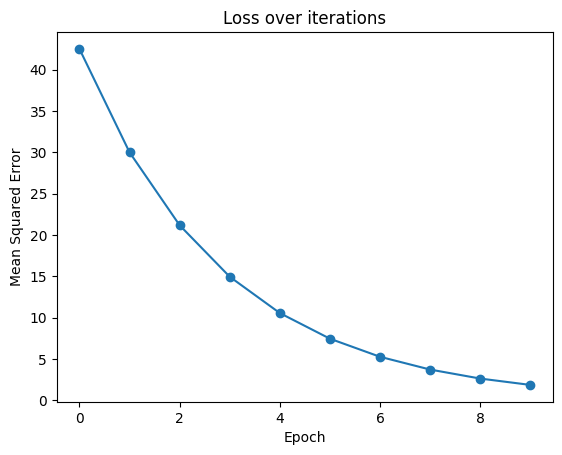

In [7]:
# Plot the loss over epochs
plt.plot(range(epochs), errors, marker='o')
plt.title('Loss over iterations')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()